# COS 322 Fall 2025 - Homework 4
## Decision Tree


This assignment will help you become familiar with how to train and evaluate a Decision Tree Classifier.
You will explore how a decision tree splits data based on feature values, measure impurity using Gini Index or Entropy, visualize the resulting tree structure, and interpret how the model makes predictions.

Please complete all required tasks in a Jupyter Notebook (.ipynb file).
When you are finished, submit your completed .ipynb file to BrightSpace.


**Due: Oct 24th, 11:59 PM**

Kind reminder: Late submissions will incur a 10% deduction per day past the deadline. Please plan accordingly and submit your work on time!

**Dataset: Iris Dataset**
The Iris dataset is built into scikit-learn, so you can directly import it using the following code:

```python
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
```

**Part 1 [70pt]**
* Please train a **baseline model** by Decision Tree Classifier, and set the hyperparameters, such as criterion, max_depth, min_samples_split, etc.
* Then make the prediction on the test set, show the confusion matrix, calculate and report: Accuracy,Precision, Recall F1-Score.
* Visualize the Tree using plot_tree(), interpret the Tree: Which features appear near the top (root node)?








In [115]:
# PLEASE START YOUR SOLUTION
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy
import pandas as pd
# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

In [116]:
# PLEASE START YOUR SOLUTION
df['type'] = iris.target
df.tail()



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),type
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [117]:
X =  df.drop('type', axis=1)
y = df['type']

In [118]:
xtrain, xtest, ytrain, ytest = train_test_split(X,y, test_size=0.3, random_state=1)


In [119]:
clf = DecisionTreeClassifier(criterion="entropy",min_samples_split=5)
clf = clf.fit(xtrain, ytrain)
y_pred = clf.predict(xtest)

In [120]:
from sklearn import tree
print("Accuracy:",metrics.accuracy_score(ytest, y_pred))
print("Precision:",metrics.precision_score(ytest, y_pred, average='weighted'))
print("Recall:",metrics.recall_score(ytest, y_pred, average='weighted'))
print("F1:",metrics.f1_score(ytest, y_pred, average='weighted'))

Accuracy: 0.9555555555555556
Precision: 0.9555555555555556
Recall: 0.9555555555555556
F1: 0.9555555555555556


[Text(0.375, 0.875, 'x[2] <= 2.6\nentropy = 1.582\nsamples = 105\nvalue = [36, 32, 37]'),
 Text(0.25, 0.625, 'entropy = 0.0\nsamples = 36\nvalue = [36, 0, 0]'),
 Text(0.5, 0.625, 'x[3] <= 1.65\nentropy = 0.996\nsamples = 69\nvalue = [0, 32, 37]'),
 Text(0.25, 0.375, 'x[2] <= 5.0\nentropy = 0.431\nsamples = 34\nvalue = [0, 31, 3]'),
 Text(0.125, 0.125, 'entropy = 0.0\nsamples = 30\nvalue = [0, 30, 0]'),
 Text(0.375, 0.125, 'entropy = 0.811\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.75, 0.375, 'x[2] <= 4.85\nentropy = 0.187\nsamples = 35\nvalue = [0, 1, 34]'),
 Text(0.625, 0.125, 'entropy = 0.811\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.875, 0.125, 'entropy = 0.0\nsamples = 31\nvalue = [0, 0, 31]')]

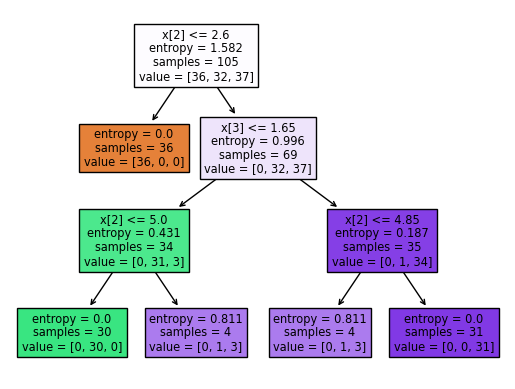

In [121]:
tree.plot_tree(clf,filled=True)

At the top of the node there appears to be decisions for petal width and length.

**Part 2 [30pt]**
* Train models with different depths((e.g., max_depth=2, max_depth=4, max_depth=None)
* Then answer:
  * How does tree depth affect accuracy?
  * How does it affect overfitting and interpretability?

In [ ]:
## How does tree depth affect accuracy?
Tree depth can be a cause for overfitting or underfitting data
## How deos it affect overfitting and interpretability?
Low tree depth can cause overfitting (lack of ability to make decisions) and thus 
result in harder to decipher predicionts (bad interpretability)


In [122]:
mdn = DecisionTreeClassifier(max_depth=0)
md2 = DecisionTreeClassifier(max_depth=2)
md4 = DecisionTreeClassifier(max_depth=4)
md6 = DecisionTreeClassifier(max_depth=6)

try:
    mdn = mdn.fit(xtrain,ytrain)
    mdnpred =  mdn.predict(xtest)
    print("Accuracy:",metrics.accuracy_score(ytest, mdnpred))
except:
    print("training with max depth 0 failed")
md2 = md2.fit(xtrain,ytrain)
md2pred =  md2.predict(xtest)
print("md2 Accuracy:",metrics.accuracy_score(ytest, md2pred))
md4 = md4.fit(xtrain,ytrain)
md4pred =  md4.predict(xtest)
print("md4 Accuracy:",metrics.accuracy_score(ytest, md4pred))
md6 = md6.fit(xtrain,ytrain)
md6pred =  md6.predict(xtest)
print("md6 Accuracy:",metrics.accuracy_score(ytest, md6pred))


training with max depth 0 failed
md2 Accuracy: 0.9555555555555556
md4 Accuracy: 0.9555555555555556
md6 Accuracy: 0.9555555555555556
